## Prepare generated data

In [42]:
TPL_PATH = '..\\olga_proj'
SAVE_PATH = '../data'
FNAME = 'Subsea_2404.tpl'
RETPL = False

In [7]:
import numpy as np
import pandas as pd
import pyfas as fa
import json
import re

import matplotlib.pyplot as plt

from utils import *

In [27]:
if RETPL:
    tpl = fa.Tpl(TPL_PATH + '\\' + FNAME)
    tpl.to_excel()
    
path_norm = re.sub(r'\\', '/', TPL_PATH)
gen = pd.read_excel(f"{path_norm}/{FNAME[:-4]}_tpl.xlsx", sep=';', decimal=',')

In [9]:
with open('columns.json') as infile:
    cols = json.load(infile)

In [28]:
pressures = ['AVG_WHP_P', 'AVG_DOWNHOLE_PRESSURE', 'DP_CHOKE_SIZE']
rates = ['BORE_GAS_VOL', 'BORE_WAT_VOL', 'BORE_OIL_VOL']

gen = gen.drop(columns=['Unnamed: 0', 
                        'VOLGBL GLOBAL (-) Global max volume error since last write', 
                        'HT GLOBAL (S) Time step'])
gen = gen.rename(columns=cols)

gen.DATEPRD /= 86400                                     # sec do day
gen.AVG_CHOKE_SIZE_P *= 1e2                              # shares to %
gen[pressures] /= 1e5                                    # Pa to bar
gen[rates] *= 86400                                      # Sm3/S to Sm3/d
gen

,DATEPRD,AVG_WHP_P,BORE_GAS_VOL,BORE_WAT_VOL,BORE_OIL_VOL,AVG_WHT_P,DP_CHOKE_SIZE,AVG_CHOKE_SIZE_P,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE
0,0.000000,42.54940,0.000000,0.000000,0.000000,11.349680,2.567181,0.0,156.3497,71.59689
1,0.000194,43.05034,17991.391680,119.003299,160.645680,11.291950,27.236870,0.0,181.7435,72.02544
2,0.000461,43.07839,10319.088960,9.624476,15.284903,11.169390,22.256640,0.0,187.3068,72.68173
3,0.000614,43.52394,3094.258752,-46.414996,-32.379134,11.145980,20.278550,0.0,190.1591,72.99558
4,0.000819,43.06188,-2159.464320,-172.441267,-266.185526,11.101830,16.697480,0.0,194.9572,73.38333
...,...,...,...,...,...,...,...,...,...,...
177445,50.993912,45.04837,0.152461,0.006569,0.003092,9.587366,113.133000,0.0,359.1406,100.72490
177446,50.995903,45.05304,0.134496,0.006989,0.002728,9.588458,113.138800,0.0,359.1660,100.72210
177447,50.997894,45.05772,0.118647,0.007354,0.002406,9.589521,113.123000,0.0,359.1272,100.72000
177448,50.999884,45.06239,0.104666,0.007671,0.002123,9.590557,113.126400,0.0,359.1452,100.71900


In [30]:
gen['Day'] = np.trunc(gen.DATEPRD).astype(int)

fst = gen.groupby('Day').head(1).reset_index(drop=True).set_index('Day')
fst = fst.drop(columns='DATEPRD')

lst = gen.groupby('Day').tail(1).reset_index(drop=True).set_index('Day')
lst = lst.drop(columns='DATEPRD')

avg = gen.groupby('Day').mean().reset_index(drop=False).set_index('Day')
avg = avg.drop(columns='DATEPRD')

gen = gen.set_index("DATEPRD")

### Plot all data

C:\Users\Asus\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


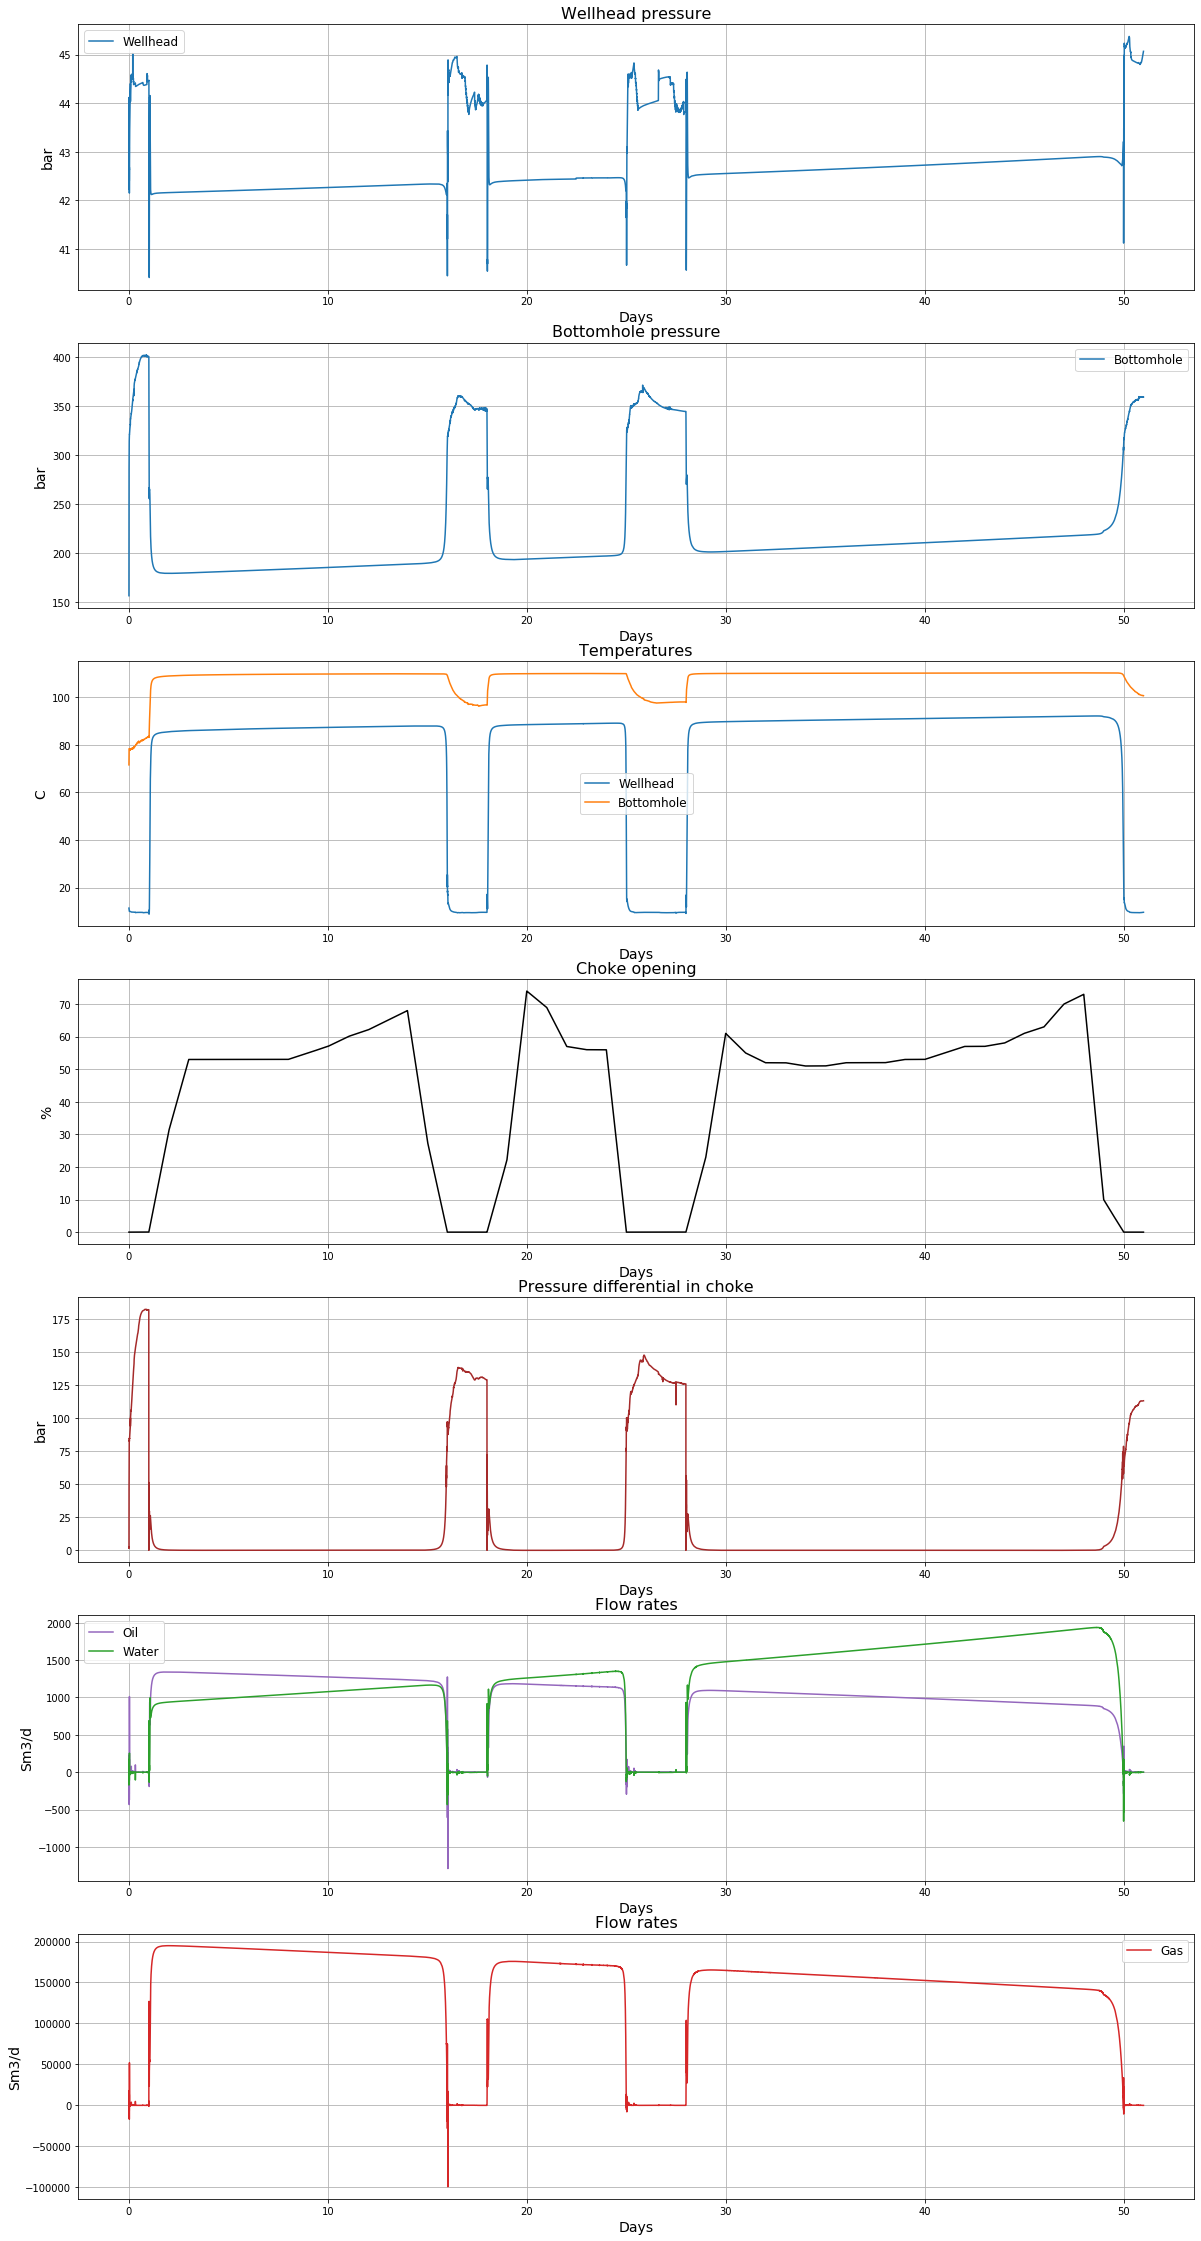

In [31]:
plot_color(gen)

### Plot discretized data

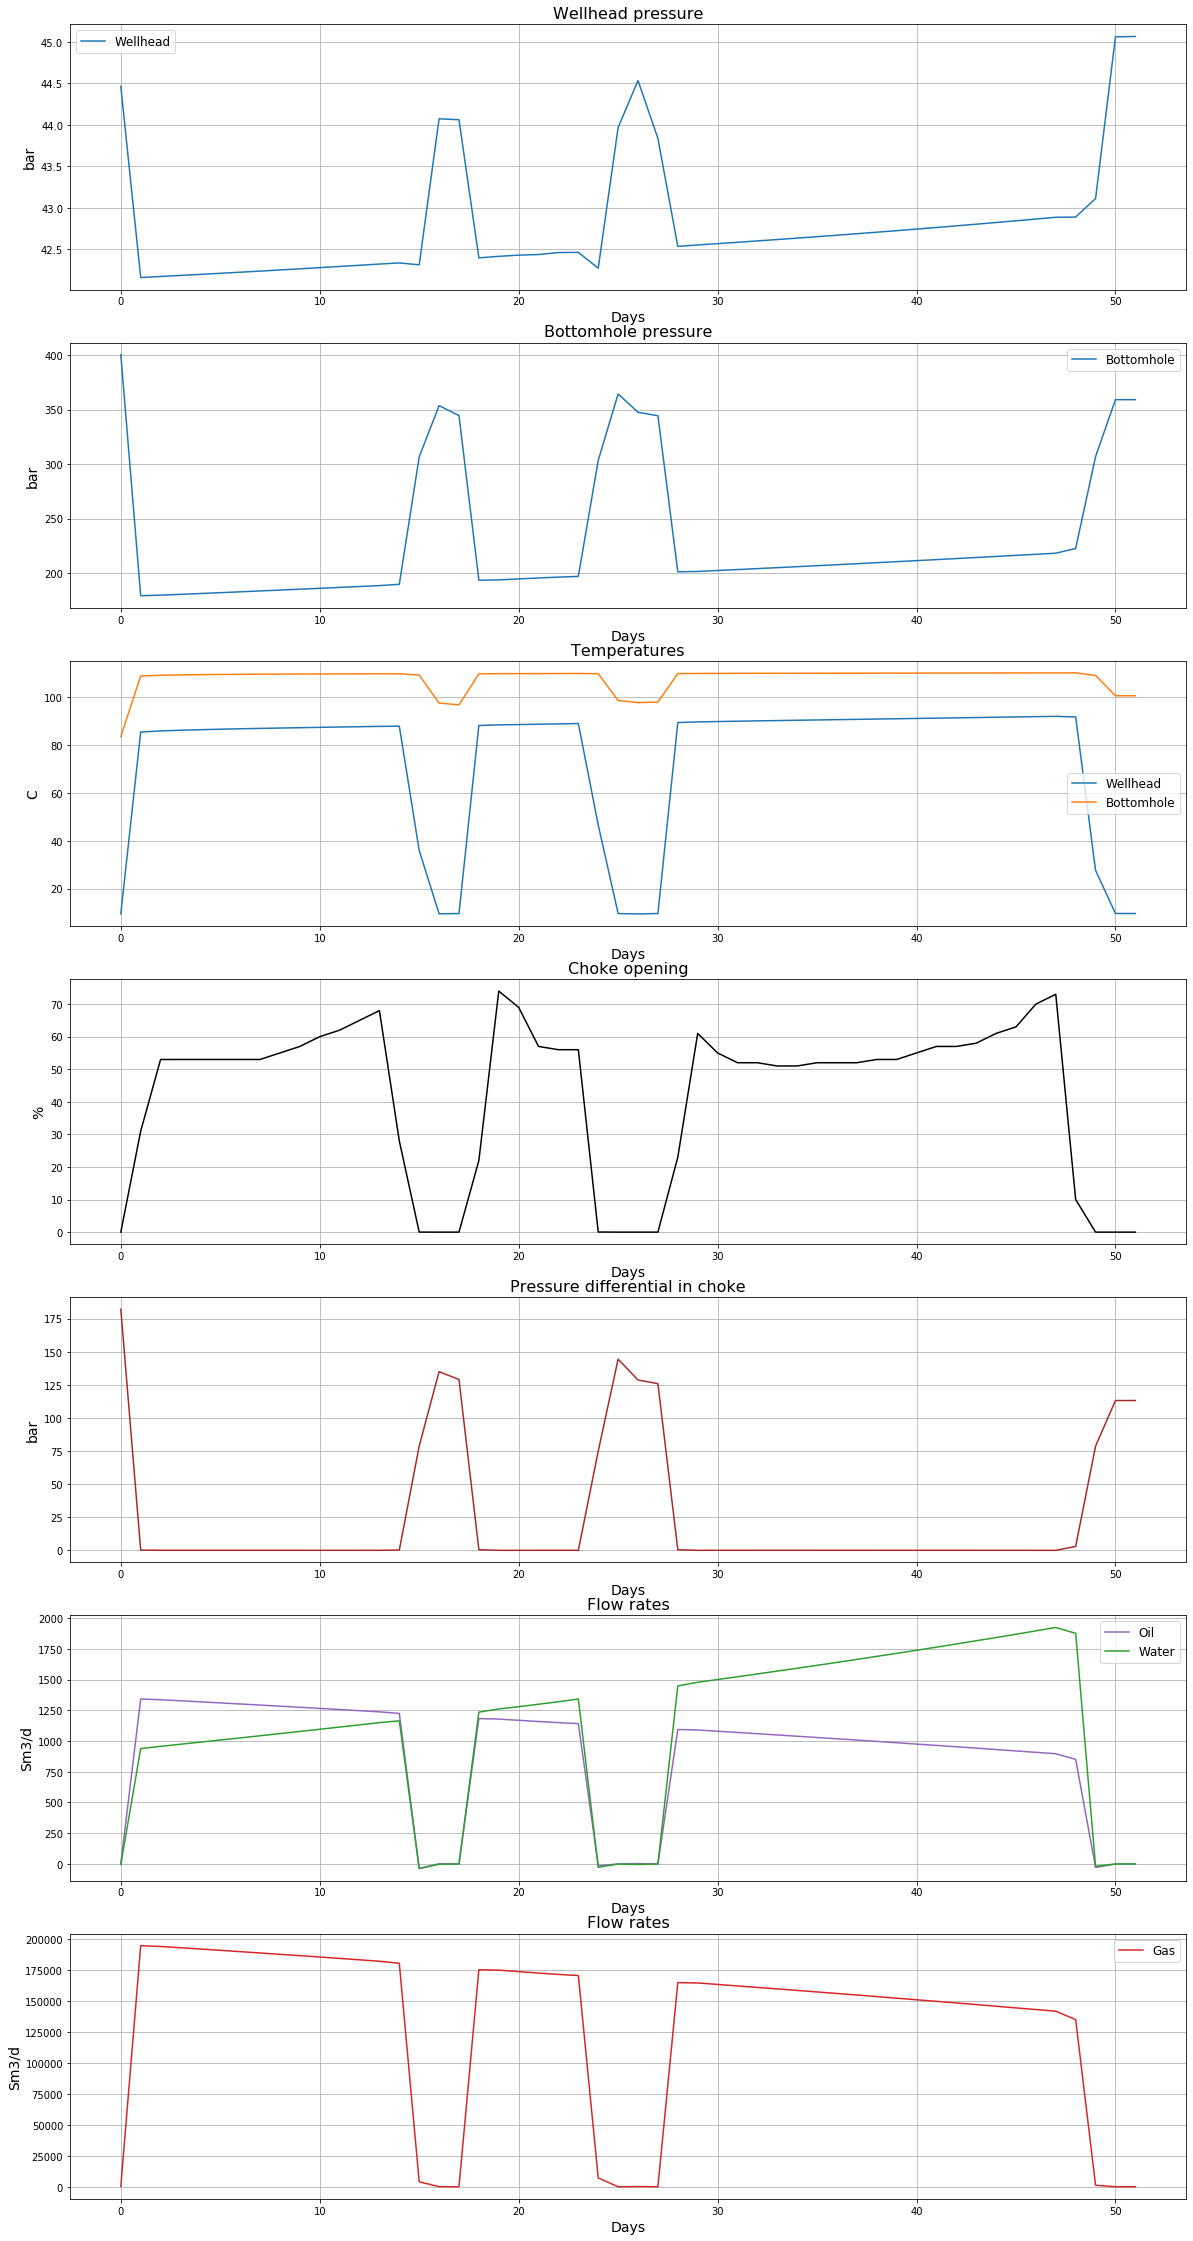

In [33]:
plot_color(lst)

In [32]:
# plot_color(fst)

In [34]:
# plot_color(avg)

### Plot reservoir characteristics

In [35]:
well = gen
watercut = well['BORE_WAT_VOL'] / (well['BORE_WAT_VOL'] + well['BORE_OIL_VOL'])
GOR = well['BORE_GAS_VOL'] / well['BORE_OIL_VOL']
Q_l = well['BORE_OIL_VOL'] + well['BORE_WAT_VOL']
Q = well['BORE_OIL_VOL'] + well['BORE_WAT_VOL'] + well['BORE_GAS_VOL']
PI = Q_l / (340 - well['AVG_DOWNHOLE_PRESSURE'])

(0, 1)

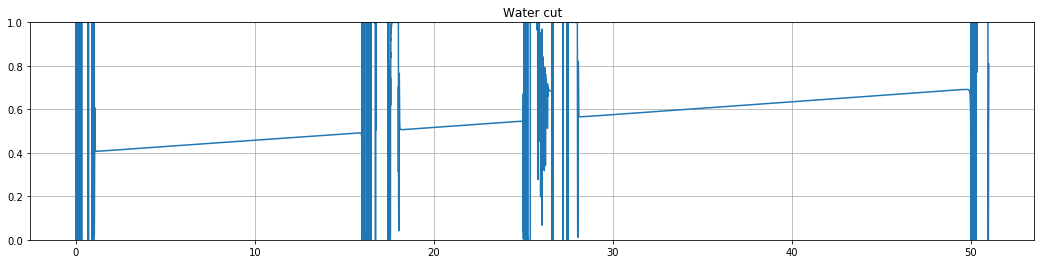

In [36]:
plt.figure(figsize=(18, 4))
plt.plot(watercut)
plt.grid(True)
plt.title("Water cut");
plt.ylim((0, 1))

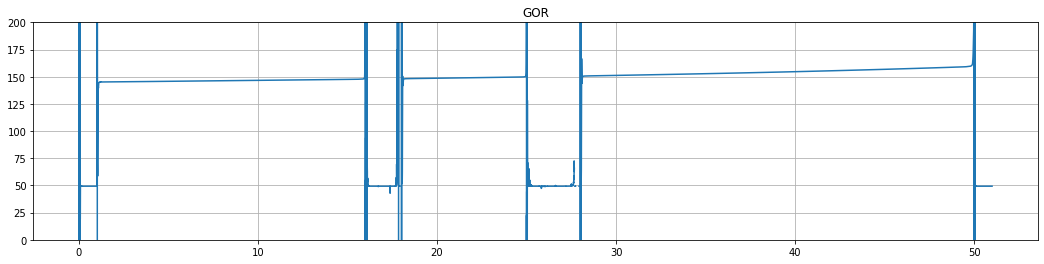

In [37]:
plt.figure(figsize=(18, 4))
plt.plot(GOR)
plt.grid(True)
plt.title("GOR")
plt.ylim((0, 200));

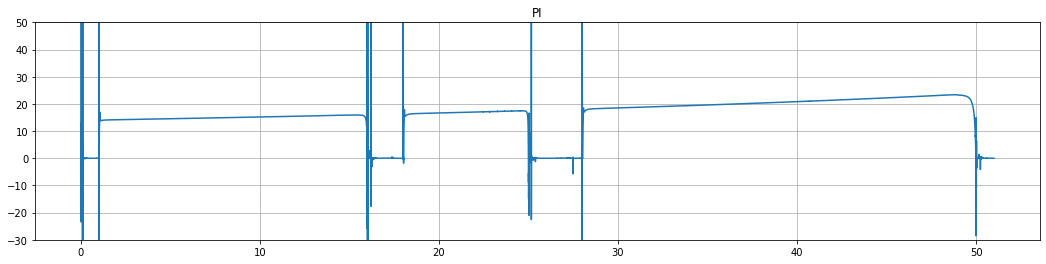

In [40]:
plt.figure(figsize=(18, 4))
plt.plot(PI)
plt.grid(True)
plt.title("PI")
plt.ylim((-30, 50));

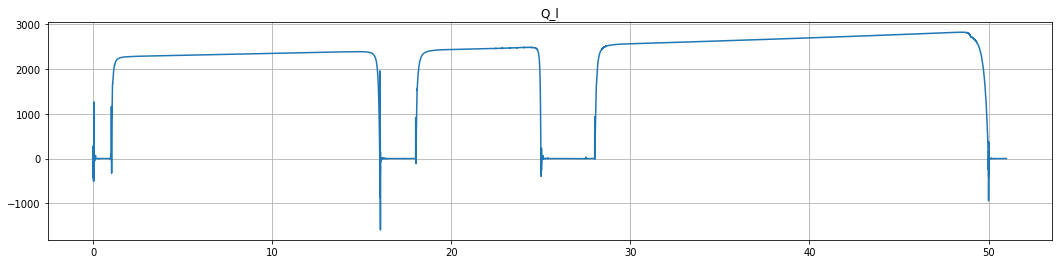

In [39]:
plt.figure(figsize=(18, 4))
plt.plot(Q_l)
plt.grid(True)
plt.title("Q_l");

### Save the resulting dataset

In [43]:
lst.to_csv(f'{SAVE_PATH}/gen.csv')